In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import pickle

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/Users/angelinakathleen/Downloads/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


(100000, 9)

In [4]:
data = data.drop_duplicates()

In [5]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [6]:
for col in categorical_data:
    print("{:20} unique values : {}".format(col, data[col].unique()))

gender               unique values : ['Female' 'Male' 'Other']
smoking_history      unique values : ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [7]:
# remove gender 'Other'
data = data[data['gender'] != 'Other']

In [8]:
data["smoking_history"].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

In [9]:
smoking = []

for i in data['smoking_history']:
    if i == 'No Info':
        smoking.append(0)
    elif i in ['never']:
        smoking.append(1)
    elif i in ['former', 'not current', 'ever']:
        smoking.append(2)
    else:
        smoking.append(3)
        
data['smoking_history'] = smoking

In [10]:
#encode gender column

ordinal_encoder = OrdinalEncoder()
data['gender'] = ordinal_encoder.fit_transform(data[['gender']])

In [11]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,1,25.19,6.6,140,0
1,0.0,54.0,0,0,0,27.32,6.6,80,0
2,1.0,28.0,0,0,1,27.32,5.7,158,0
3,0.0,36.0,0,0,3,23.45,5.0,155,0
4,1.0,76.0,1,1,3,20.14,4.8,155,0


<AxesSubplot:>

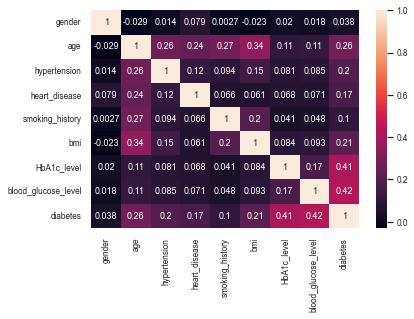

In [12]:
#plot heatmap
sns.set(font_scale = 0.75)
sns.heatmap(data.corr(), annot = True)

In [13]:
X = data.drop(['diabetes'], axis = 1).values
y = data['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
model = RandomForestClassifier()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)

In [16]:
model.score(X_test, y_test)

0.9666077187142411

In [17]:
filename = '/Users/angelinakathleen/Downloads/model96.pkl'
pickle.dump(model, open(filename, 'wb'))